<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-29 17:41:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  72.8MB/s    in 2.8s    

2025-06-29 17:41:21 (72.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [31]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


          CompTotal  count
0               NaN  31697
1      0.000000e+00    127
2      1.000000e+00     12
3      2.000000e+00      4
4      3.000000e+00      1
...             ...    ...
3333   8.000000e+27      1
3334   1.000000e+44      1
3335   1.000000e+53      1
3336   1.000000e+65      1
3337  1.000000e+150      1

[3338 rows x 2 columns]


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


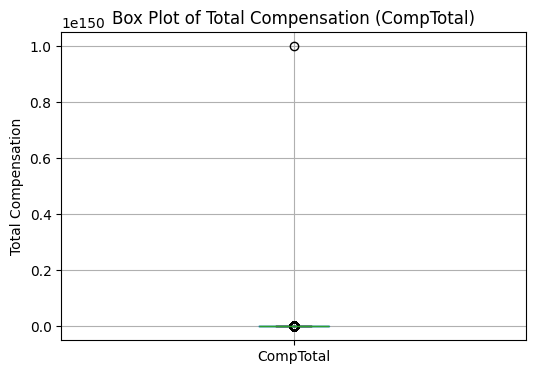

In [19]:
QUERY = """
SELECT CompTotal
FROM main
"""
df_comptotal = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(6, 4))
df_comptotal.boxplot()
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Total Compensation')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


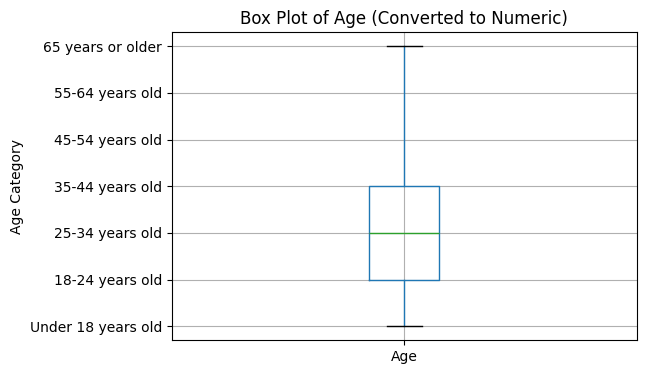

In [26]:
QUERY = """
SELECT Age
FROM main
"""
df_age = pd.read_sql_query(QUERY, conn)

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
# Map age categories to numerical values for plotting
age_mapping = {age: i for i, age in enumerate(age_order)}

# Convert 'Age' column to ordered categorical and then to numerical codes
df_age['Age_numeric'] = df_age['Age'].map(age_mapping)
# Create the box plot
plt.figure(figsize=(6, 4))
df_age.boxplot(column='Age_numeric')
plt.title('Box Plot of Age (Converted to Numeric)')
plt.ylabel('Numeric Age Value')
plt.xticks([1], ['Age'])
plt.yticks(range(len(age_order)), age_order)
plt.ylabel('Age Category')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 600x400 with 0 Axes>

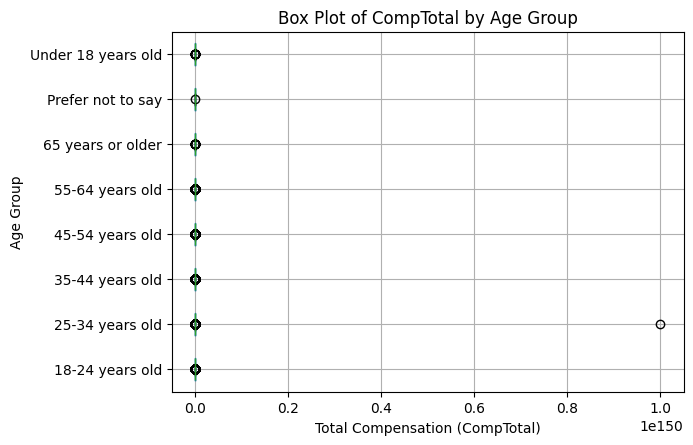

In [49]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_comp_age = pd.read_sql_query(QUERY, conn)

# Define the order of age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Convert 'CompTotal' to numeric, coercing errors
df_comp_age['CompTotal'] = pd.to_numeric(df_comp_age['CompTotal'], errors='coerce')

# Create the box plot
plt.figure(figsize=(6, 4))
df_comp_age.boxplot(column='CompTotal', by='Age', vert=False)
plt.title('Box Plot of CompTotal by Age Group')
plt.suptitle('') # Suppress the default title
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Age Group')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

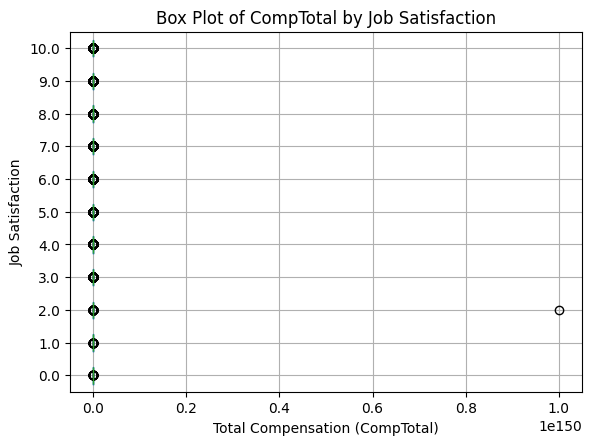

In [40]:
QUERY = """
SELECT JobSat, CompTotal
FROM main
WHERE JobSat IS NOT NULL AND CompTotal IS NOT NULL
"""
df_comp_jobsat = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric, coercing errors
df_comp_jobsat['CompTotal'] = pd.to_numeric(df_comp_jobsat['CompTotal'], errors='coerce')

# Drop rows where 'CompTotal' is NaN after conversion
df_comp_jobsat.dropna(subset=['CompTotal'], inplace=True)

# Create the box plot
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
df_comp_jobsat.boxplot(column='CompTotal', by='JobSat', vert=False)
plt.title('Box Plot of CompTotal by Job Satisfaction')
plt.suptitle('') # Suppress the default title
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Job Satisfaction')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x800 with 0 Axes>

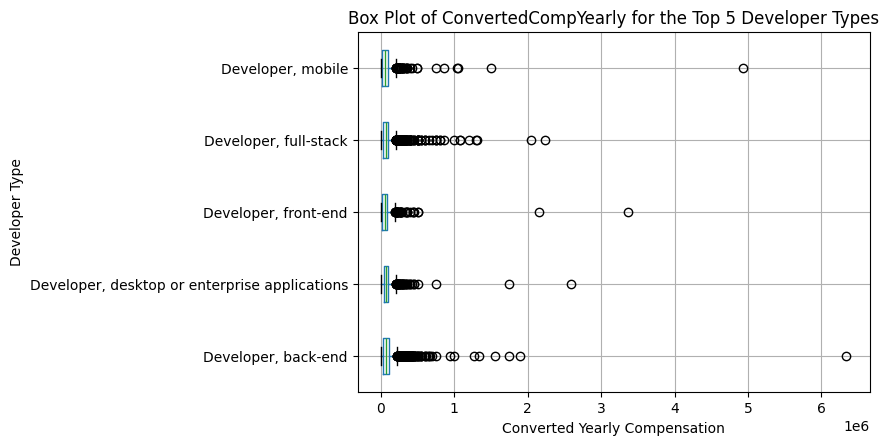

In [53]:
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""
df_devtype_comp = pd.read_sql_query(QUERY, conn)

# Convert 'ConvertedCompYearly' to numeric, coercing errors
df_devtype_comp['ConvertedCompYearly'] = pd.to_numeric(df_devtype_comp['ConvertedCompYearly'], errors='coerce')

# Drop rows where 'ConvertedCompYearly' is NaN after conversion
df_devtype_comp.dropna(subset=['ConvertedCompYearly'], inplace=True)

# Get the top 5 developer types based on count
top_devtypes = df_devtype_comp['DevType'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 developer types
df_top_devtypes = df_devtype_comp[df_devtype_comp['DevType'].isin(top_devtypes)]

# Create the box plot
plt.figure(figsize=(12, 8))
df_top_devtypes.boxplot(column='ConvertedCompYearly', by='DevType', vert=False)
plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.suptitle('') # Suppress the default title
plt.xlabel('Converted Yearly Compensation')
plt.ylabel('Developer Type')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x800 with 0 Axes>

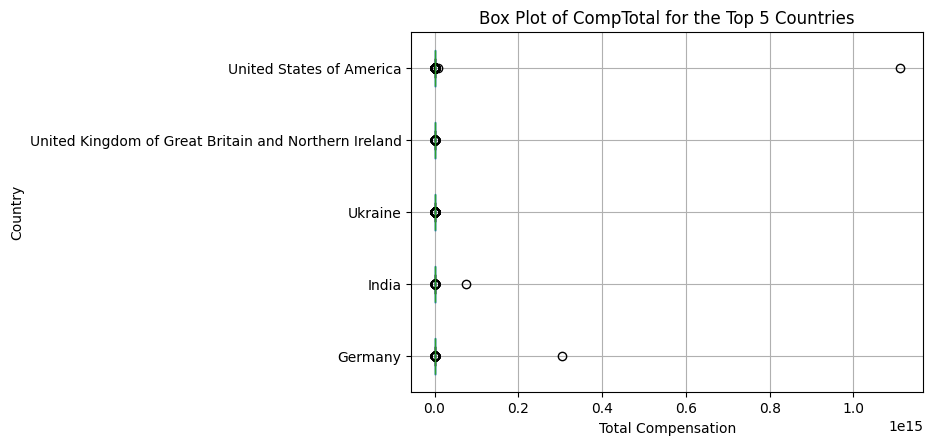

In [57]:
QUERY = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

# Get the top 5 countries based on count
top_countries = df_country_comp['Country'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 countries
df_top_countries = df_country_comp[df_country_comp['Country'].isin(top_countries)]

# Create the box plot
plt.figure(figsize=(12, 8))
df_top_countries.boxplot(column='CompTotal', by='Country', vert=False)
plt.title('Box Plot of CompTotal for the Top 5 Countries')
plt.suptitle('') # Suppress the default title
plt.xlabel('Total Compensation')
plt.ylabel('Country')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1000x600 with 0 Axes>

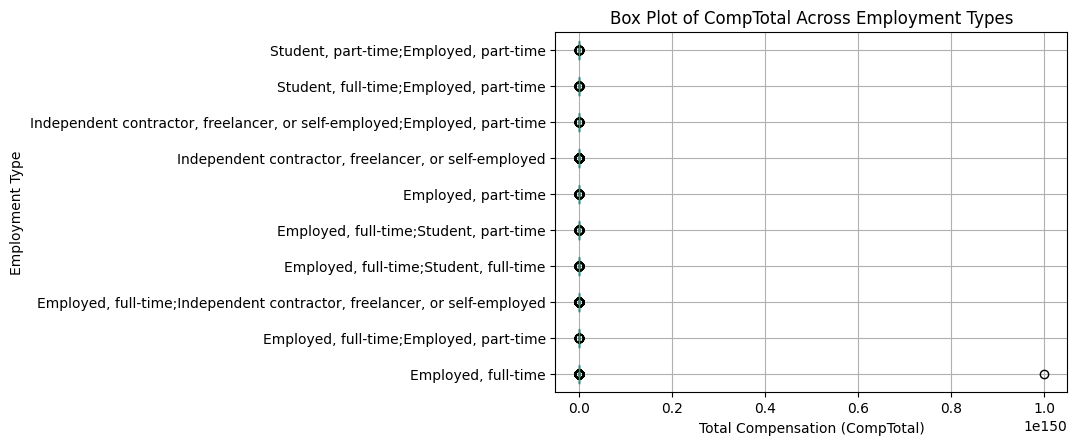

In [60]:
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df_emp_comp = pd.read_sql_query(QUERY, conn)

# Get the top 10 employment types based on count
top_employments = df_emp_comp['Employment'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 5 countries
df_emp_comp = df_emp_comp[df_emp_comp['Employment'].isin(top_employments)]

# Create the box plot
plt.figure(figsize=(10, 6))
df_emp_comp.boxplot(column='CompTotal', by='Employment', vert=False)
plt.title('Box Plot of CompTotal Across Employment Types')
plt.suptitle('') # Suppress the default title
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Employment Type')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

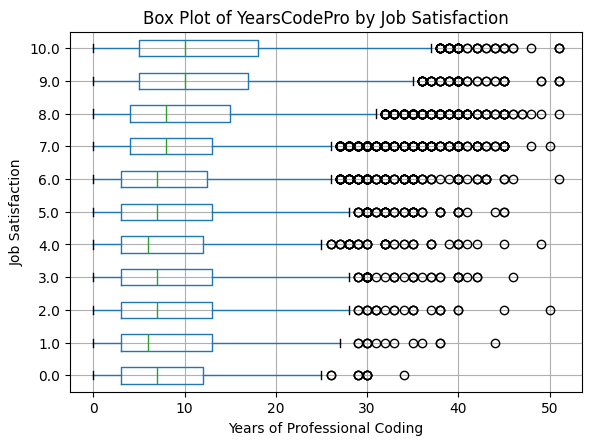

In [61]:
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df_yearscode_jobsat = pd.read_sql_query(QUERY, conn)

# Convert 'YearsCodePro' to numeric, coercing errors. Handle 'More than 50 years' and 'Less than 1 year'
def convert_yearscode(year_str):
    if year_str == 'More than 50 years':
        return 51 # Represent as a value slightly above 50
    elif year_str == 'Less than 1 year':
        return 0 # Represent as 0 or 0.5
    else:
        return pd.to_numeric(year_str, errors='coerce')

df_yearscode_jobsat['YearsCodePro_numeric'] = df_yearscode_jobsat['YearsCodePro'].apply(convert_yearscode)

# Drop rows where 'YearsCodePro_numeric' is NaN after conversion
df_yearscode_jobsat.dropna(subset=['YearsCodePro_numeric'], inplace=True)

# Create the box plot
plt.figure(figsize=(10, 6)) # Adjust figure size
df_yearscode_jobsat.boxplot(column='YearsCodePro_numeric', by='JobSat', vert=False)
plt.title('Box Plot of YearsCodePro by Job Satisfaction')
plt.suptitle('') # Suppress the default title
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [62]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.


In [52]:
# Check the available columns in the 'main' table
QUERY = """
PRAGMA table_info(main);
"""
df_columns = pd.read_sql_query(QUERY, conn)
print(df_columns)

     cid                 name     type  notnull dflt_value  pk
0      0           ResponseId  INTEGER        0       None   0
1      1           MainBranch     TEXT        0       None   0
2      2                  Age     TEXT        0       None   0
3      3           Employment     TEXT        0       None   0
4      4           RemoteWork     TEXT        0       None   0
..   ...                  ...      ...      ...        ...  ..
109  109      JobSatPoints_11     REAL        0       None   0
110  110         SurveyLength     TEXT        0       None   0
111  111           SurveyEase     TEXT        0       None   0
112  112  ConvertedCompYearly     REAL        0       None   0
113  113               JobSat     REAL        0       None   0

[114 rows x 6 columns]
